In [2]:
pip install pandas scikit-learn openpyxl seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\Dell\AppData\Local\Temp\ipykernel_3920\2093462013.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
# Load the data
file_path = "Spam Email Detection.xlsx"
spam_data = pd.read_excel(file_path, sheet_name='spam')

In [5]:
# Retain only the relevant columns and rename them
spam_data = spam_data[['v1', 'v2']].copy()  # Explicitly create a copy
spam_data.columns = ['label', 'text']

In [46]:
# Convert all text data to string type to avoid any type issues
spam_data['text'] = spam_data['text'].astype(str)

In [47]:
# Convert labels to binary values (0 for ham, 1 for spam)
label_encoder = LabelEncoder()
spam_data['label'] = label_encoder.fit_transform(spam_data['label'])

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(spam_data['text'], spam_data['label'], test_size=0.2, random_state=42)

In [49]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95)

In [50]:
# Fit and transform the training data, transform the test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [51]:
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [52]:
# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

In [53]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [54]:
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.9524663677130045
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



In [55]:
# Function to plot the confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [56]:
# Function to plot top N TF-IDF features
def plot_top_tfidf_features(tfidf_vectorizer, model, N=20):
    # Get the feature names and their corresponding coefficients
    feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
    coefficients = model.coef_.flatten()

    # Get the top N most important features for spam classification
    top_positive_coefficients = np.argsort(coefficients)[-N:]
    top_negative_coefficients = np.argsort(coefficients)[:N]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

    # Plot the top features
    plt.figure(figsize=(10, 5))
    colors = ['red' if c < 0 else 'blue' for c in coefficients[top_coefficients]]
    plt.bar(np.arange(2 * N), coefficients[top_coefficients], color=colors)
    plt.xticks(np.arange(0, 2 * N), feature_names[top_coefficients], rotation=60, ha='right')
    plt.title(f'Top {N} TF-IDF Features')
    plt.show()

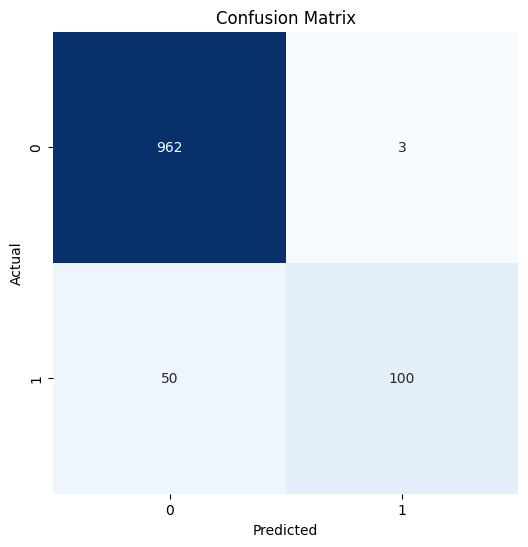

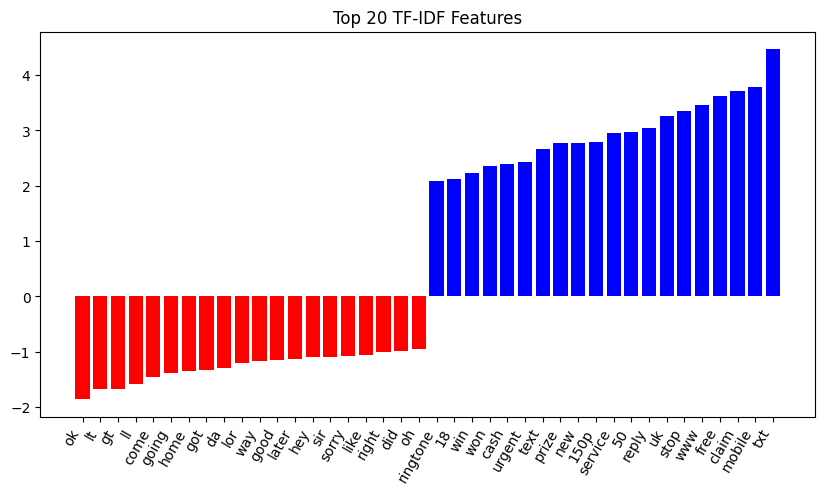

In [57]:
# Visualize the confusion matrix and top TF-IDF features
plot_confusion_matrix(y_test, y_pred)
plot_top_tfidf_features(tfidf_vectorizer, model)

In [58]:
# Function to predict if an email is spam or ham
def predict_email_spam(email_text):
    # Convert the input text to the TF-IDF format
    email_tfidf = tfidf_vectorizer.transform([email_text])
    
    # Predict the label (0 = ham, 1 = spam)
    prediction = model.predict(email_tfidf)[0]
    
    # Convert prediction back to label
    return 'spam' if prediction == 1 else 'ham'

In [61]:
email = input("Enter the email text to predict if it's spam or not: ")
result = predict_email_spam(email)
print(f"The email is predicted to be: {result}")

The email is predicted to be: spam
